In [1]:
import pandas as pd
import numpy as np
# Loading data
df = pd.read_csv(r"C:\Users\umesh\employees.csv") # r - raw data path
df.head()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,08-06-1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,03-04-2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services


In [2]:
df.tail()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
995,Henry,NaN,11/23/2014,6:09 AM,132483,16.655,False,Distribution
996,Phillip,Male,1/31/1984,6:30 AM,42392,19.675,False,Finance
997,Russell,Male,5/20/2013,12:39 PM,96914,1.421,False,Product
998,Larry,Male,4/20/2013,4:45 PM,60500,11.985,False,Business Development
999,Albert,Male,5/15/2012,6:24 PM,129949,10.169,True,Sales


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   First Name         933 non-null    object 
 1   Gender             855 non-null    object 
 2   Start Date         1000 non-null   object 
 3   Last Login Time    1000 non-null   object 
 4   Salary             1000 non-null   int64  
 5   Bonus %            1000 non-null   float64
 6   Senior Management  933 non-null    object 
 7   Team               957 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 62.6+ KB


In [5]:
# (rows, Columns)
df.shape

(1000, 8)

In [7]:
# Converting start date data type
df['Start Date'] = pd.to_datetime(df['Start Date'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   First Name         933 non-null    object        
 1   Gender             855 non-null    object        
 2   Start Date         1000 non-null   datetime64[ns]
 3   Last Login Time    1000 non-null   object        
 4   Salary             1000 non-null   int64         
 5   Bonus %            1000 non-null   float64       
 6   Senior Management  933 non-null    object        
 7   Team               957 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 62.6+ KB


In [10]:
# Unique values in tha data 
df.nunique()

First Name           200
Gender                 2
Start Date           972
Last Login Time      720
Salary               995
Bonus %              971
Senior Management      2
Team                  10
dtype: int64

In [13]:
# Finding null values
df.isnull().sum()

First Name           67
Gender                0
Start Date            0
Last Login Time       0
Salary                0
Bonus %               0
Senior Management    67
Team                 43
dtype: int64

In [12]:
# Filling gender
df['Gender'].fillna('No gender', inplace=True)

In [14]:
mode = df['Senior Management'].mode()
mode 

0    True
Name: Senior Management, dtype: object

In [15]:
mode = df['Senior Management'].mode().values[0]
mode 

True

In [20]:
df['Senior Management'] = df['Senior Management'].replace(np.nan, mode)
df.isnull().sum()

First Name            67
Gender                 0
Start Date             0
Last Login Time        0
Salary                 0
Bonus %                0
Senior Management      0
Team                  43
Senionr Management     0
dtype: int64

In [24]:
team = df['Team'].mode()
team

0    Client Services
Name: Team, dtype: object

In [25]:
# Drop na values
df = df.dropna(axis=0, how='any')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 899 entries, 0 to 999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   First Name          899 non-null    object        
 1   Gender              899 non-null    object        
 2   Start Date          899 non-null    datetime64[ns]
 3   Last Login Time     899 non-null    object        
 4   Salary              899 non-null    int64         
 5   Bonus %             899 non-null    float64       
 6   Senior Management   899 non-null    bool          
 7   Team                899 non-null    object        
 8   Senionr Management  899 non-null    bool          
dtypes: bool(2), datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 57.9+ KB


In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

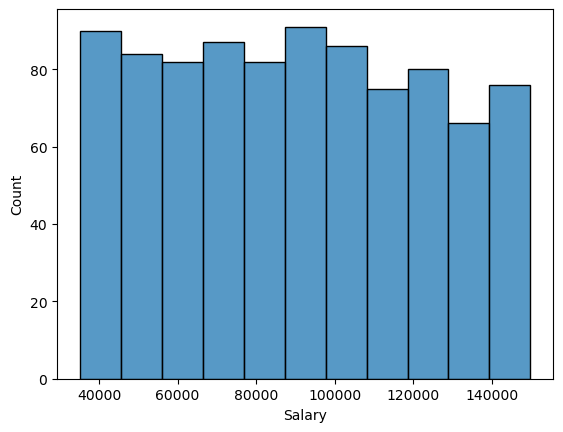

In [32]:
sns.histplot(x='Salary', data= df)
plt.show()

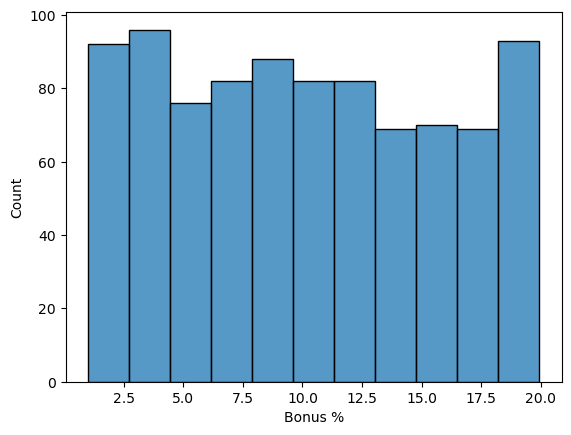

In [33]:
sns.histplot(x='Bonus %', data= df)
plt.show()

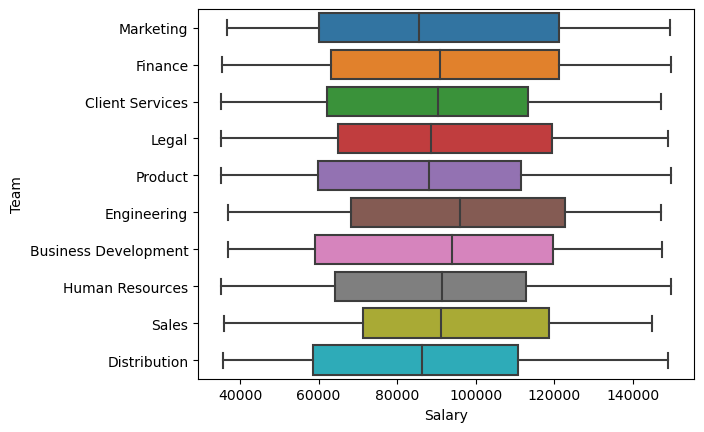

In [34]:
sns.boxplot(x='Salary', y='Team', data= df)
plt.show()

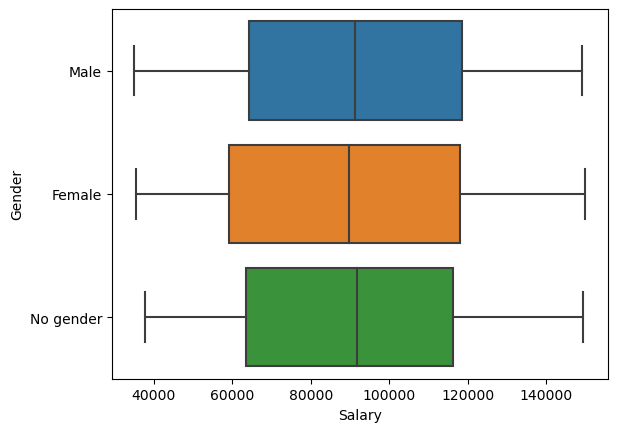

In [35]:
sns.boxplot(x='Salary', y='Gender', data= df)
plt.show()

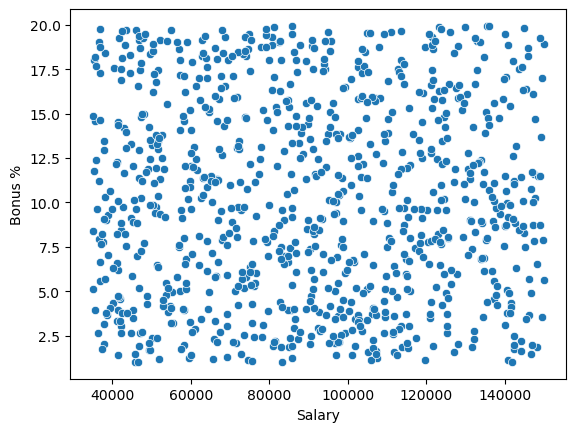

In [36]:
# Scatter plot
sns.scatterplot(x='Salary', y='Bonus %', data=df)
plt.show()

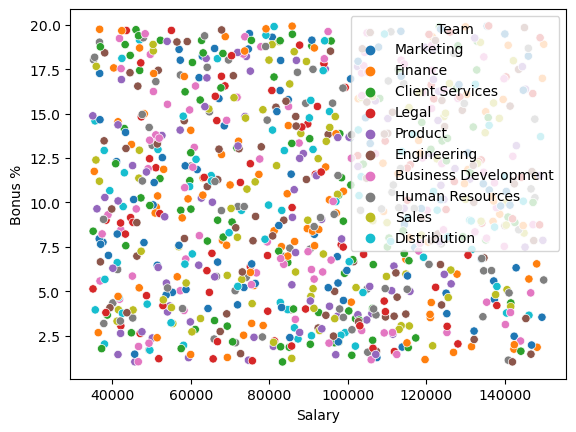

In [37]:
sns.scatterplot(x='Salary', y='Bonus %', data=df, hue='Team')
plt.show()

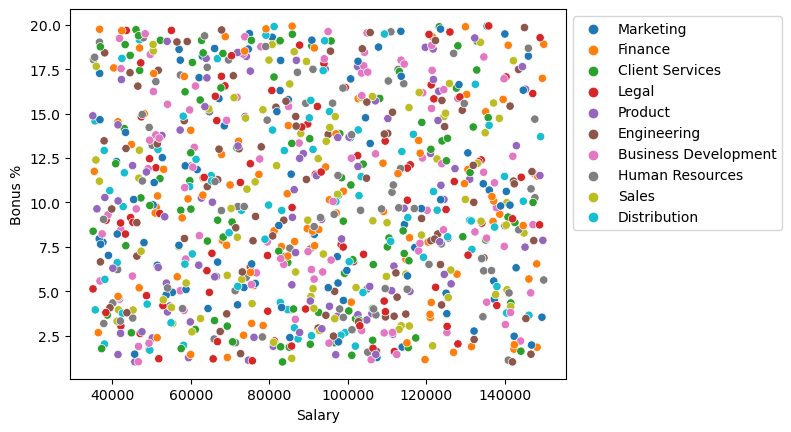

In [38]:
sns.scatterplot(x='Salary', y='Bonus %', data=df, hue='Team')

# Placing legend outside the figures
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

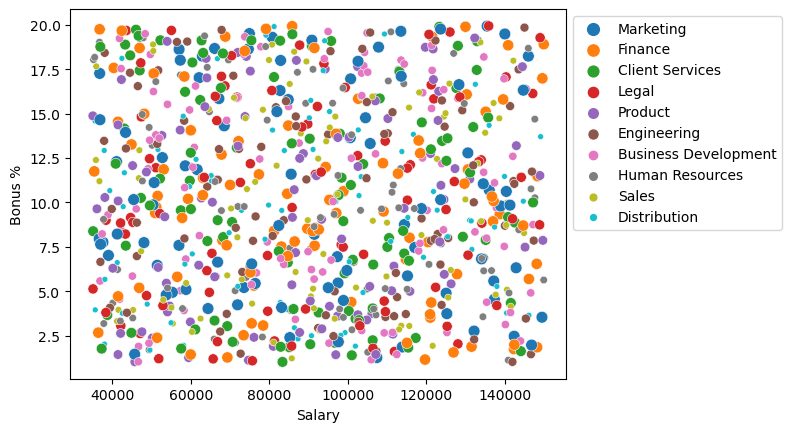

In [39]:
sns.scatterplot(x='Salary', y='Bonus %', data=df, hue='Team', size='Team')

# Placing legend outside the figures
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

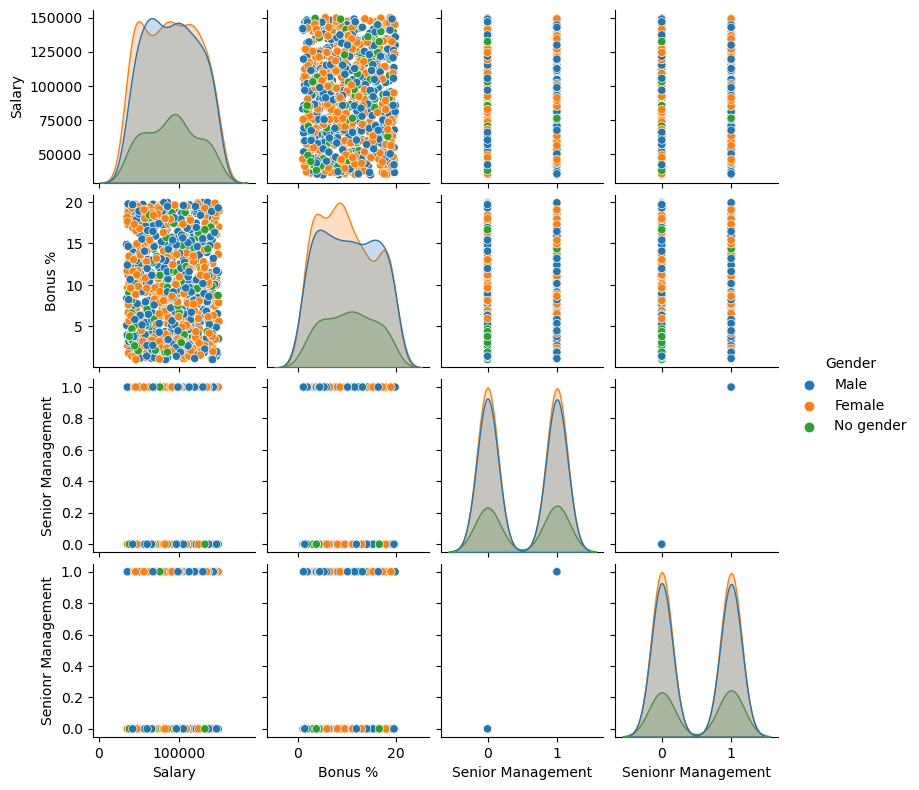

In [40]:
# Pair plot
sns.pairplot(df, hue='Gender', height=2)
plt.show()

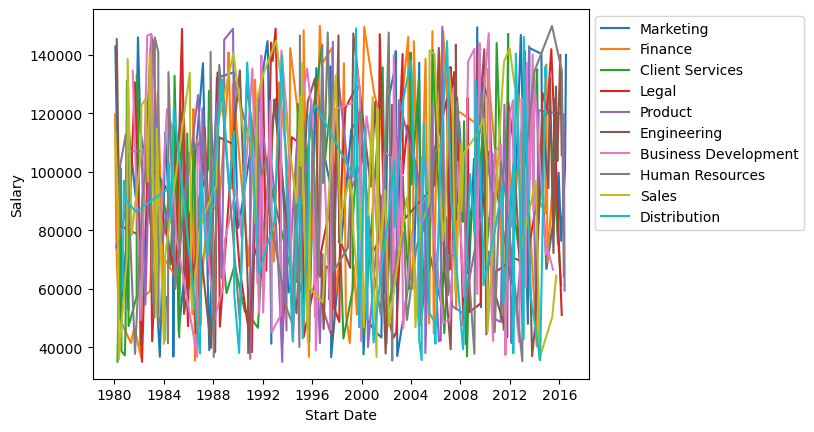

In [42]:
sns.lineplot(x='Start Date', y='Salary', data=df, hue='Team')
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

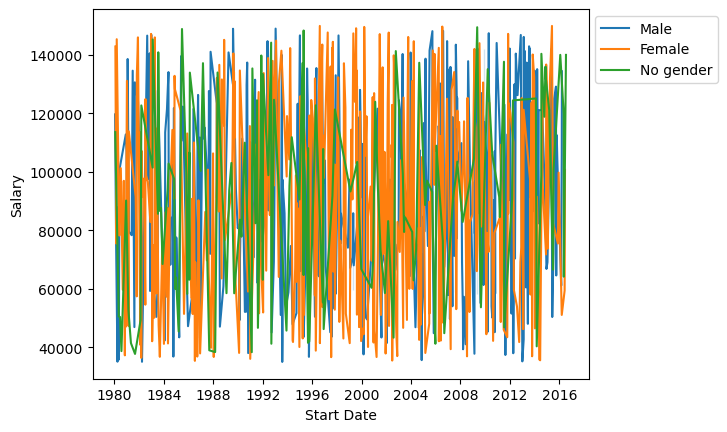

In [43]:
sns.lineplot(x='Start Date', y='Salary', data=df, hue='Gender')
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

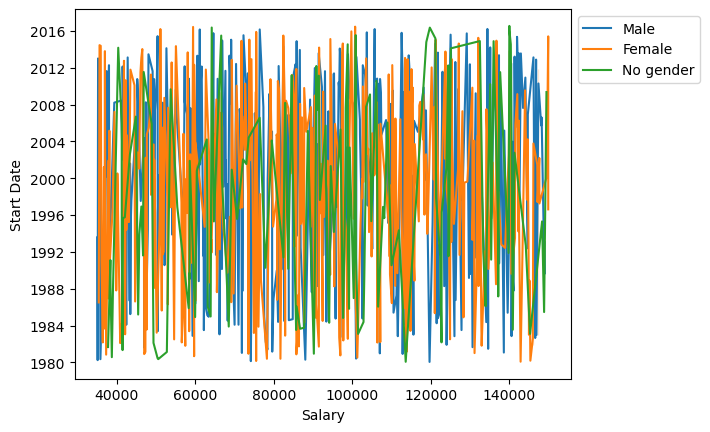

In [44]:
sns.lineplot(x='Salary', y='Start Date', data=df, hue='Gender')
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

In [45]:
df.nunique()

First Name            200
Gender                  3
Start Date            879
Last Login Time       681
Salary                894
Bonus %               877
Senior Management       2
Team                   10
Senionr Management      2
dtype: int64

In [46]:
df.head()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team,Senionr Management
0,Douglas,Male,1993-08-06,12:42 PM,97308,6.945,True,Marketing,True
2,Maria,Female,1993-04-23,11:17 AM,130590,11.858,False,Finance,False
3,Jerry,Male,2005-03-04,1:00 PM,138705,9.340,True,Finance,True
4,Larry,Male,1998-01-24,4:47 PM,101004,1.389,True,Client Services,True
5,Dennis,Male,1987-04-18,1:35 AM,115163,10.125,False,Legal,False


In [52]:
# Load data set
df = sns.load_dataset('Iris')
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

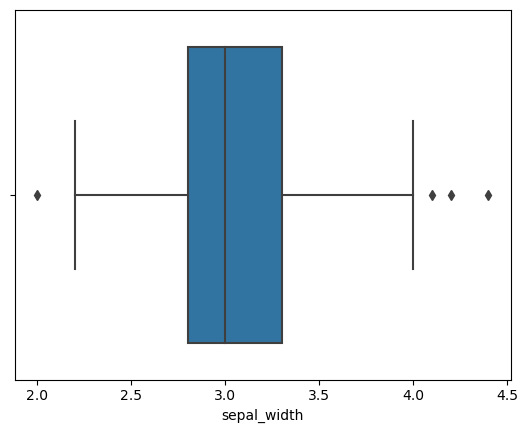

In [53]:
sns.boxplot(x='sepal_width', data=df)
plt.show()

In [67]:
Q1 = np.percentile(df['sepal_width'], 25, method='midpoint')
Q3=np.percentile(df['sepal_width'], 75, method='midpoint')
iqr = Q3 - Q1
upper_bound = Q3 + 1.5 * iqr
lower_bound = Q1 - 1.5 * iqr
Upper_outlier = np.where(df['sepal_width'] >= upper_bound)
Lower_outlier = np.where(df['sepal_width'] <= lower_bound)


In [68]:
df.drop(Upper_outlier[0], inplace=True)

In [70]:
df.drop(Lower_outlier[0], inplace=True)

In [71]:
df.shape

(146, 5)

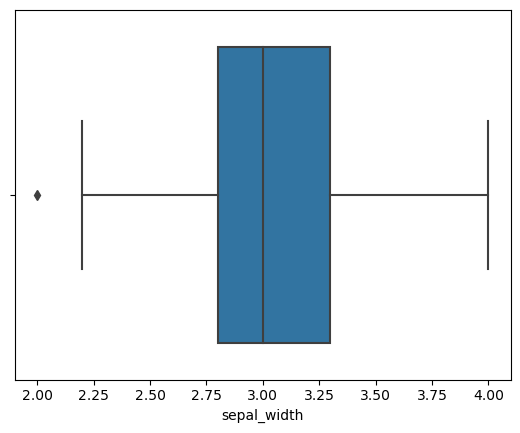

In [73]:
sns.boxplot(x='sepal_width', data=df)
plt.show()